In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from PIL import Image
import numpy as np
import random

In [2]:
data = pd.read_excel('../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions_All_Features_PCA.xlsx')
# print(data)

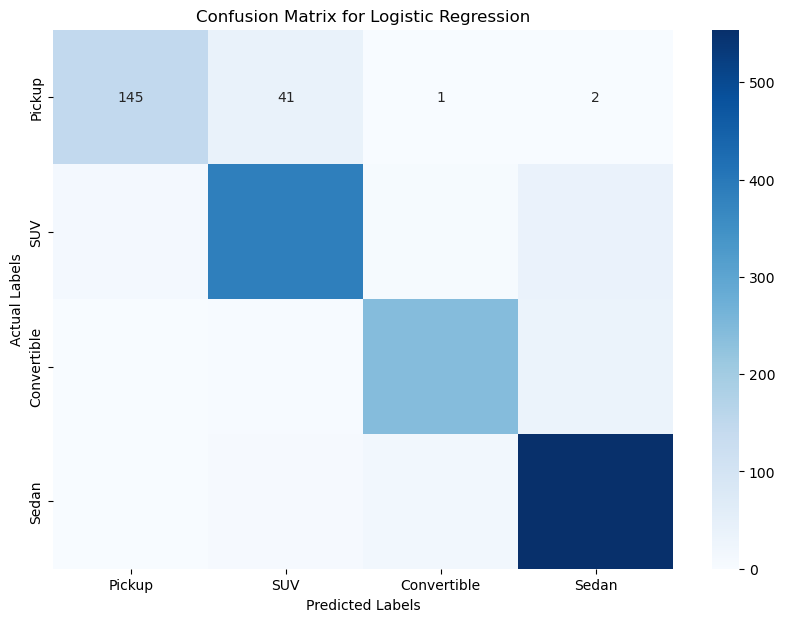

In [3]:
actual_labels = data['Class']
predicted_column = f'Logistic_Regression_Classification'
predicted_labels = data[predicted_column]

cm = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

#Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

## Generic Function to Analyze Classifier Performance

In [4]:
def analyze_classifier_performance(base_path, classifier_name, images_root_dir):
    
    random.seed(42) 
    classifier_colors = {
        'Logistic Regression': 'Blues',
        'XGBoost': 'Reds',
        'SVM': 'Greens',
        'Random Forest':'YlGnBu'
    }
    
    classifier_dir = os.path.join('../../Output/Classifier Evaluation', classifier_name) 
    os.makedirs(classifier_dir, exist_ok=True) 

    file_pattern = os.path.join(base_path, classifier_name, f'{classifier_name.replace(" ", "_")}*.xlsx')
    files = glob.glob(file_pattern)

    if not files:
        print(f"No Excel files found for classifier '{classifier_name}' in '{classifier_dir}'.")
        return
    
    output_dir = os.path.join(classifier_dir, 'Output')
    os.makedirs(output_dir, exist_ok=True)
    
    for file_path in files:
        base_file_name = os.path.basename(file_path).rsplit('.', 1)[0]
        data = pd.read_excel(file_path)
        actual_labels = data['Class']
        predicted_column = [col for col in data.columns if 'Classification' in col][0]
        predicted_labels = data[predicted_column]

        # Classification Report
        report_file_name = os.path.join(classifier_dir, f'{base_file_name}_Classification_Report.xlsx')
        report = classification_report(actual_labels, predicted_labels, output_dict=True)
        pd.DataFrame(report).transpose().to_excel(report_file_name)

        cm_color = classifier_colors.get(classifier_name, 'Blues')
        cm = confusion_matrix(actual_labels, predicted_labels, labels=np.unique(actual_labels))
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap=cm_color,
                    xticklabels=np.unique(actual_labels), yticklabels=np.unique(actual_labels))
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title(f'Confusion Matrix for {base_file_name}')
        cm_image_name = os.path.join(classifier_dir, f'{base_file_name}_Confusion_Matrix.png')
        plt.savefig(cm_image_name)
        plt.close()
        
        print(f"Processed {file_path}:")
        print(f" - Classification report saved as {report_file_name}")
        print(f" - Confusion matrix image saved as {cm_image_name}")


        # Misclassified Images
        misclassified_indices = np.where(actual_labels != predicted_labels)[0]
        selected_indices = random.sample(list(misclassified_indices), min(5, len(misclassified_indices)))
        if selected_indices:
            plt.figure(figsize=(20, 4))
            for i, index in enumerate(selected_indices, 1):
                excel_image_path = data.iloc[index]['image_path_no_blur'].strip().lstrip('.').lstrip('/')
                while excel_image_path.startswith('..'):
                    excel_image_path = '/'.join(excel_image_path.split('/', 2)[1:])
                    
                # Modify here: replace 'No_Blur' with 'No Blur' in the directory name
                excel_image_path = excel_image_path.replace('No_Blur', 'No Blur')
                
                path_parts = excel_image_path.split('/')
                filename_no_blur = path_parts[-1].split('.')[0] + '_no_blur.jpg'
                path_parts[-1] = filename_no_blur
                full_image_path = os.path.join(images_root_dir, *path_parts)
                
                print(f"Trying to open: {full_image_path}") 

                try:
                    image = Image.open(full_image_path)
                    plt.subplot(1, 5, i)
                    plt.imshow(image)
                    plt.title(f'{actual_labels[index]} Misclassified As {predicted_labels[index]}')
                    plt.axis('off')
                except FileNotFoundError:
                    print(f"File not found: {full_image_path}")

            misclassified_images_name = os.path.join(classifier_dir, f'{classifier_name}_Misclassified_Images.png')
            plt.savefig(misclassified_images_name)
            plt.close()

            print(f" - Misclassified images display saved as {misclassified_images_name}")

In [5]:
analyze_classifier_performance('../../Data/Predictions/', 'Logistic Regression','../../')

Processed ../../Data/Predictions/Logistic Regression\Logistic_Regression_Classifier_Predictions_All_Data.xlsx:
 - Classification report saved as ../../Output/Classifier Evaluation\Logistic Regression\Logistic_Regression_Classifier_Predictions_All_Data_Classification_Report.xlsx
 - Confusion matrix image saved as ../../Output/Classifier Evaluation\Logistic Regression\Logistic_Regression_Classifier_Predictions_All_Data_Confusion_Matrix.png
Trying to open: ../../Images\test\No Blur\SUV_test_orig_test_01451_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Convertible_test_orig_train_06671_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Pickup_test_orig_train_06577_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Pickup_test_orig_train_02903_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Convertible_test_orig_train_05070_resized_no_blur.jpg
 - Misclassified images display saved as ../../Output/Classifier Evaluation\Logistic Regression\L

In [6]:
analyze_classifier_performance('../../Data/Predictions/', 'SVM','../../')

Processed ../../Data/Predictions/SVM\SVM_Classifier_Predictions_All_Features_PCA.xlsx:
 - Classification report saved as ../../Output/Classifier Evaluation\SVM\SVM_Classifier_Predictions_All_Features_PCA_Classification_Report.xlsx
 - Confusion matrix image saved as ../../Output/Classifier Evaluation\SVM\SVM_Classifier_Predictions_All_Features_PCA_Confusion_Matrix.png
Trying to open: ../../Images\test\No Blur\Convertible_test_orig_train_05023_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_test_06761_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Pickup_test_orig_test_00768_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Sedan_test_orig_train_07357_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_train_03920_resized_no_blur.jpg
 - Misclassified images display saved as ../../Output/Classifier Evaluation\SVM\SVM_Misclassified_Images.png
Processed ../../Data/Predictions/SVM\SVM_Classifier_Predictions_Indivi

In [7]:
#run this to get the Confusion matrix and classfication report files

analyze_classifier_performance('../../Data/Predictions/', 'XGBoost','../../')

Processed ../../Data/Predictions/XGBoost\XGBoost_Classifier_Predictions_All_Data.xlsx:
 - Classification report saved as ../../Output/Classifier Evaluation\XGBoost\XGBoost_Classifier_Predictions_All_Data_Classification_Report.xlsx
 - Confusion matrix image saved as ../../Output/Classifier Evaluation\XGBoost\XGBoost_Classifier_Predictions_All_Data_Confusion_Matrix.png
Trying to open: ../../Images\test\No Blur\Pickup_test_orig_test_04976_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_test_06761_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Pickup_test_orig_train_06796_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_train_05520_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Convertible_test_orig_test_00472_resized_no_blur.jpg
 - Misclassified images display saved as ../../Output/Classifier Evaluation\XGBoost\XGBoost_Misclassified_Images.png
Processed ../../Data/Predictions/XGBoost\XGBoost_Classifier_Pr

In [8]:
analyze_classifier_performance('../../Data/Predictions/', 'Random Forest','../../')

Processed ../../Data/Predictions/Random Forest\Random_Forest_Classifier_Predictions_All_Data.xlsx:
 - Classification report saved as ../../Output/Classifier Evaluation\Random Forest\Random_Forest_Classifier_Predictions_All_Data_Classification_Report.xlsx
 - Confusion matrix image saved as ../../Output/Classifier Evaluation\Random Forest\Random_Forest_Classifier_Predictions_All_Data_Confusion_Matrix.png
Trying to open: ../../Images\test\No Blur\SUV_test_orig_test_06702_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\Convertible_test_orig_test_07120_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_test_06761_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_train_02070_resized_no_blur.jpg
Trying to open: ../../Images\test\No Blur\SUV_test_orig_train_00977_resized_no_blur.jpg
 - Misclassified images display saved as ../../Output/Classifier Evaluation\Random Forest\Random Forest_Misclassified_Images.png
Processed ../../Data